# Random crop sampling

Different strategies for sampling random crops with area and aspect ratio withing given ranges.

In [1]:
import operator

import matplotlib.patches
import matplotlib.pyplot as plt
import numpy as np


def plot(
    rand_i,
    rand_j,
    rand_h,
    rand_w,
    *,
    area_min,
    area_max,
    ratio_min,
    ratio_max,
    marker_size,
):
    print(f"Area min:\t{area_min:.1%}")
    print(f"Area max:\t{area_max:.1%}")
    print(f"Ratio min:\t{ratio_min:.1f}")
    print(f"Ratio max:\t{ratio_max:.1f}")

    fig, axs = plt.subplots(2, 4, figsize=(20, 10), facecolor="white")
    w = np.linspace(0, 1, 100)[1:]

    ax = axs[0, 0]
    ax.plot(w, area_min / w, color="red")
    ax.plot(w, area_max / w, color="red")
    ax.plot(w, w / ratio_min, color="orange")
    ax.plot(w, w / ratio_max, color="orange")
    ax.scatter(rand_w, rand_h, s=marker_size, alpha=0.1)
    ax.set_title("Distribution of box sides")
    ax.set_xlabel("Width")
    ax.set_ylabel("Height")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect("equal")

    ax = axs[0, 1]
    ax.scatter(rand_j + rand_w / 2, rand_i + rand_h / 2, s=marker_size, alpha=0.1)
    ax.set_title("Distribution of box centers")
    ax.set_xlabel("Center (horiz)")
    ax.set_ylabel("Center (vert)")

    ax = axs[0, 2]
    ax.scatter(rand_j, rand_i, s=marker_size, alpha=0.1, color="darkgreen")
    ax.scatter(
        rand_j + rand_w, rand_i + rand_h, s=marker_size, alpha=0.1, color="royalblue"
    )
    ax.set_title("Distribution of box corners")
    ax.set_xlabel("From left")
    ax.set_ylabel("From top")

    ax = axs[0, 3]
    for idx in range(10):
        ax.add_patch(
            matplotlib.patches.Rectangle(
                (rand_j[idx], rand_i[idx]),
                rand_w[idx],
                rand_h[idx],
                fill=False,
                lw=1,
                color=f"C{idx}",
            )
        )
    ax.set_title("Sample boxes")
    ax.set_xlabel("From left")
    ax.set_ylabel("From top")

    for ax in axs[0, 1:]:
        ax.set_xlim([0, 1])
        ax.set_ylim([1, 0])
        ax.set_aspect("equal")

    ax = axs[1, 0]
    ax.hist(rand_w / rand_h)
    ax.axvline(ratio_min, color="orange")
    ax.axvline(ratio_max, color="orange")
    ax.set_title("Distribution of aspect ratios")
    ax.set_xlabel("Ratio w/h")

    ax = axs[1, 1]
    ax.hist(rand_w * rand_h)
    ax.axvline(area_min, color="red")
    ax.axvline(area_max, color="red")
    ax.set_title("Distribution of areas")
    ax.set_xlabel("Area w*h")

    ax = axs[1, 2]
    ax.hist(rand_j + rand_w / 2, bins=np.linspace(0, 1, 100))
    ax.set_title("Distribution of centers (horiz)")
    ax.set_xlabel("From left")
    ax.set_xlim([0, 1])

    ax = axs[1, 3]
    ax.hist(rand_i + rand_h / 2, bins=np.linspace(0, 1, 100))
    ax.set_title("Distribution of centers (vert)")
    ax.set_xlabel("From top")
    ax.set_xlim([0, 1])

    display(fig)
    plt.close(fig)


def assert_inside_image(i, j, h, w):
    np.testing.assert_array_compare(operator.__ge__, i, 0, "Top coord")
    np.testing.assert_array_compare(operator.__ge__, j, 0, "Left coord")
    np.testing.assert_array_compare(operator.__le__, i + h, 1, "Bottom coord")
    np.testing.assert_array_compare(operator.__le__, j + w, 1, "Right coord")


def assert_ratio(h, w, ratio_min, ratio_max):
    ratio = w / h
    np.testing.assert_array_compare(operator.__ge__, ratio, ratio_min, "Ratio min")
    np.testing.assert_array_compare(operator.__le__, ratio, ratio_max, "Ratio max")


def assert_area(h, w, area_min, area_max):
    area = w * h
    np.testing.assert_array_compare(operator.__ge__, area, area_min, "Ratio min")
    np.testing.assert_array_compare(operator.__le__, area, area_max, "Ratio max")


params_all = [
    {
        "area_min": 0.2,
        "area_max": 0.5,
        "ratio_min": 2 / 3,
        "ratio_max": 3 / 2,
    },
    {
        "area_min": 0.1,
        "area_max": 0.9,
        "ratio_min": 1 / 2,
        "ratio_max": 2,
    },
    {
        "area_min": 0.1,
        "area_max": 0.9,
        "ratio_min": 1 / 5,
        "ratio_max": 1 / 2,
    },
    {
        "area_min": 0.3,
        "area_max": 0.9,
        "ratio_min": 1 / 10,
        "ratio_max": 1 / 2,
    },
    {
        "area_min": 0.4,
        "area_max": 0.9,
        "ratio_min": 1 / 5,
        "ratio_max": 5,
    },
    {
        "area_min": 0.01,
        "area_max": 0.25,
        "ratio_min": 2 / 3,
        "ratio_max": 3 / 2,
    },
    {
        "area_min": 0.6,
        "area_max": 1.0,
        "ratio_min": 2 / 3,
        "ratio_max": 3 / 2,
    },
]

## Strategy 1

- Sample top-left coordinates `(i, j)` uniformly inside the unit square.
- Sample height, and width from a uniform distribution.
- Reject all combinations `(i, j, h, w)` that don't match the area and ratio constraints or that don't fall inside the image.

Success rate:	2.04%
Area min:	20.0%
Area max:	50.0%
Ratio min:	0.7
Ratio max:	1.5


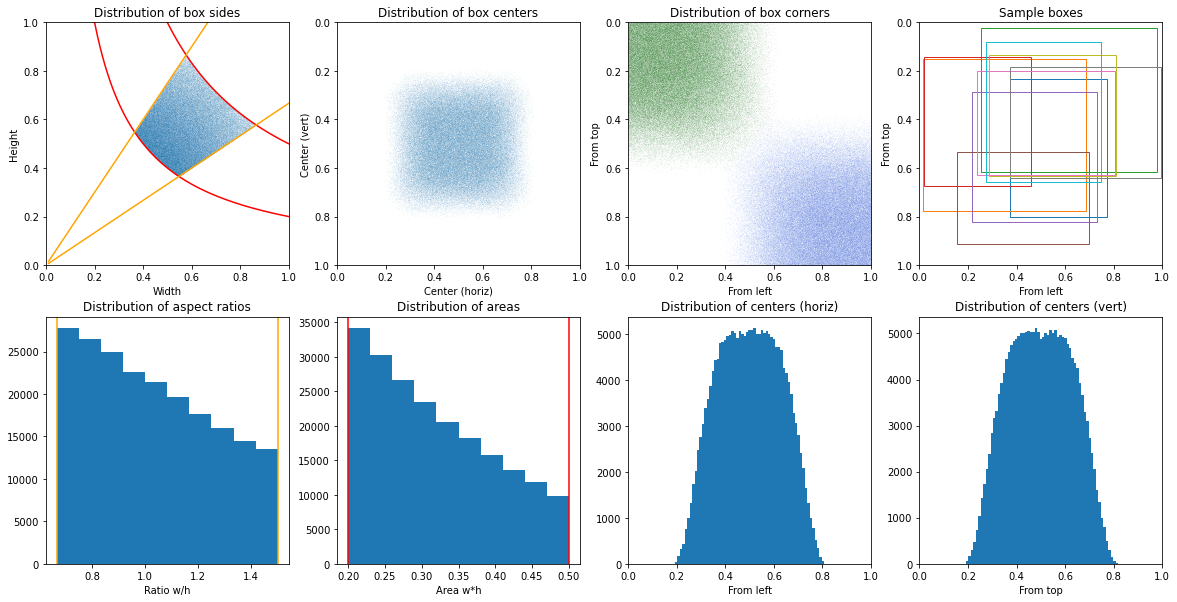

Success rate:	6.11%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.5
Ratio max:	2.0


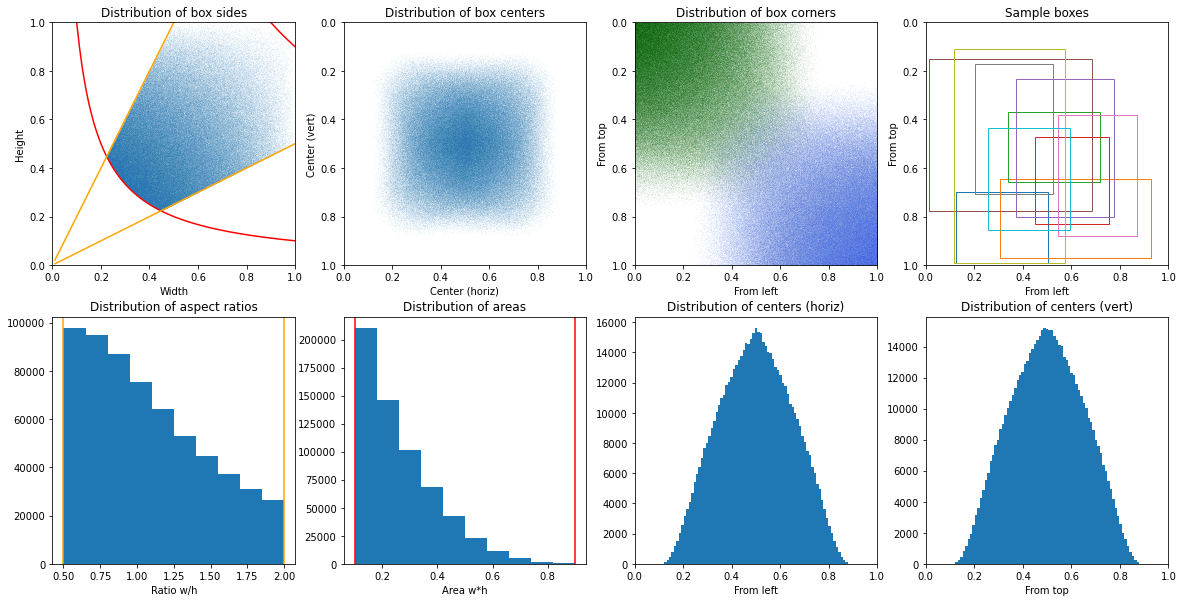

Success rate:	1.59%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	0.5


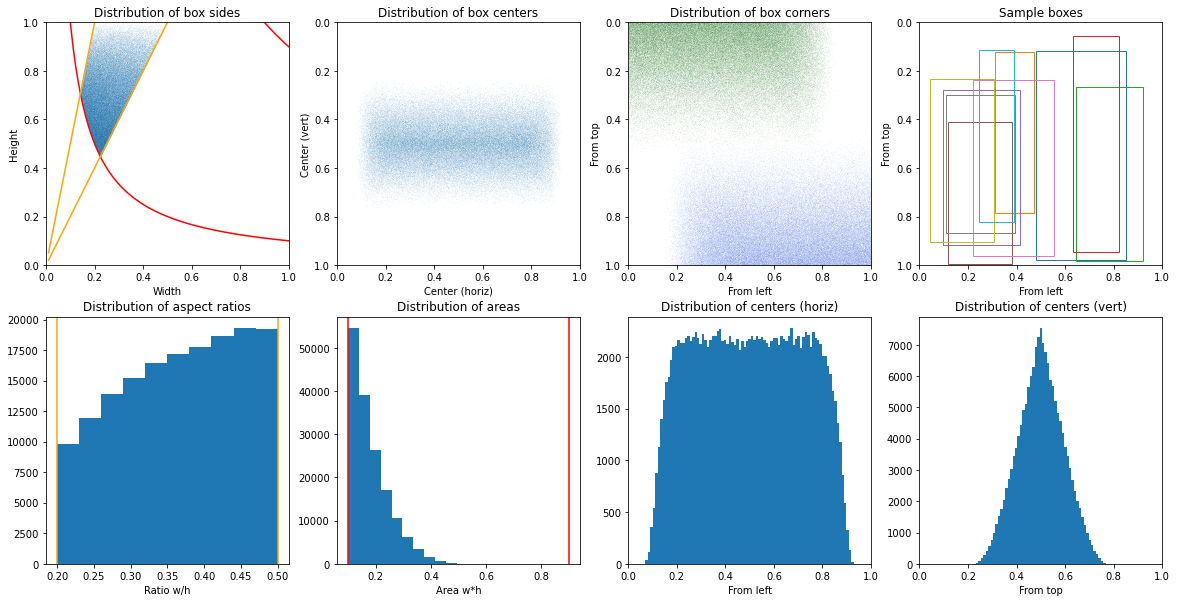

Success rate:	0.11%
Area min:	30.0%
Area max:	90.0%
Ratio min:	0.1
Ratio max:	0.5


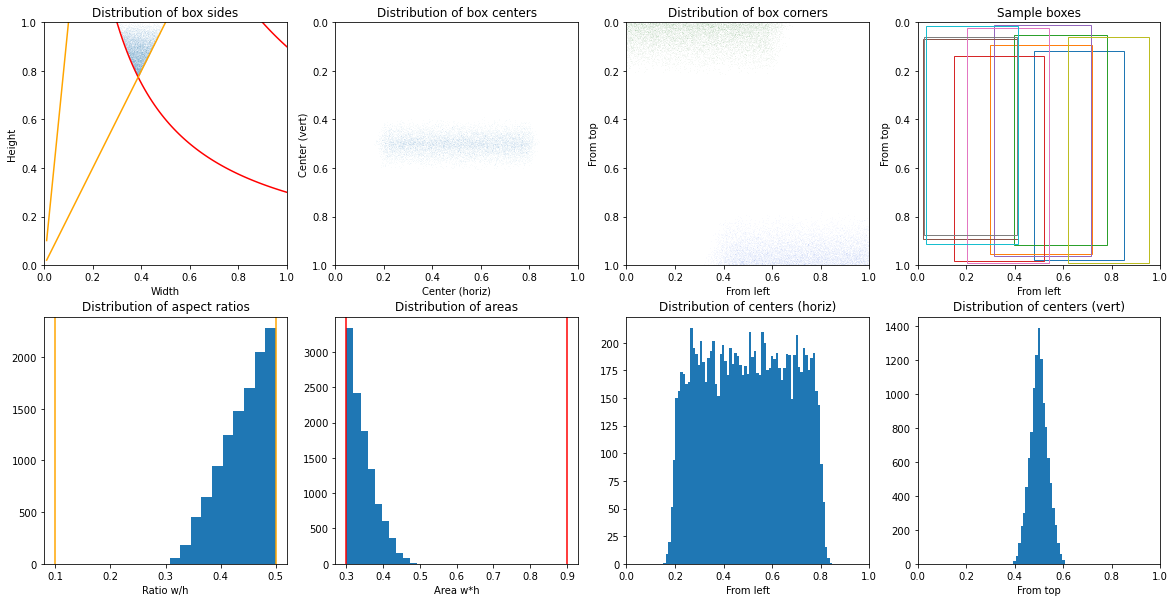

Success rate:	1.01%
Area min:	40.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	5.0


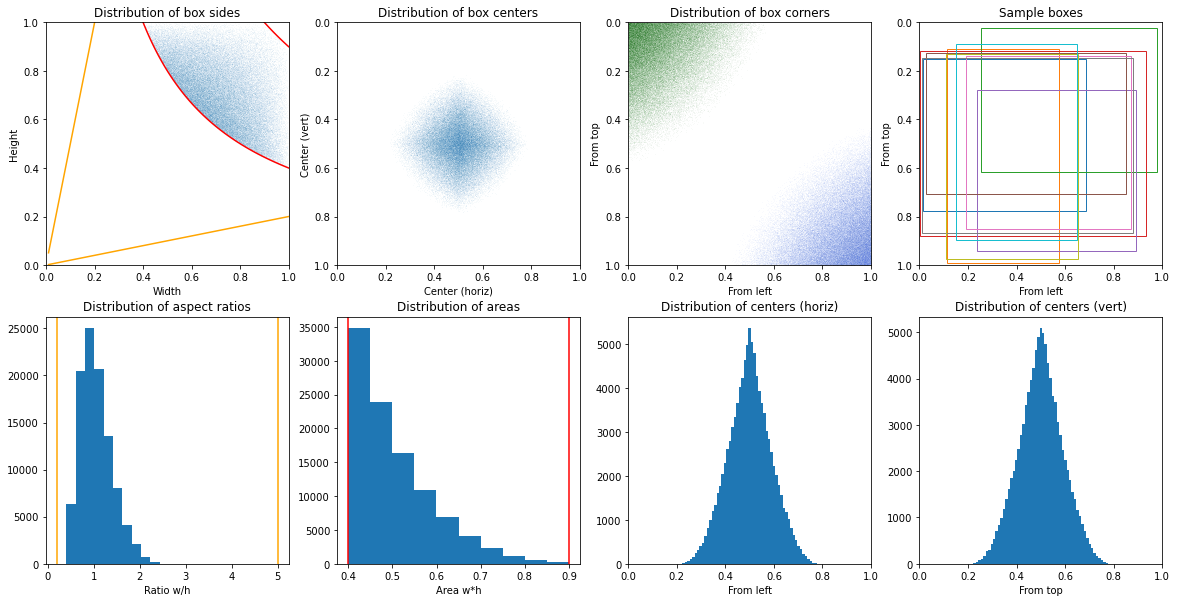

Success rate:	4.25%
Area min:	1.0%
Area max:	25.0%
Ratio min:	0.7
Ratio max:	1.5


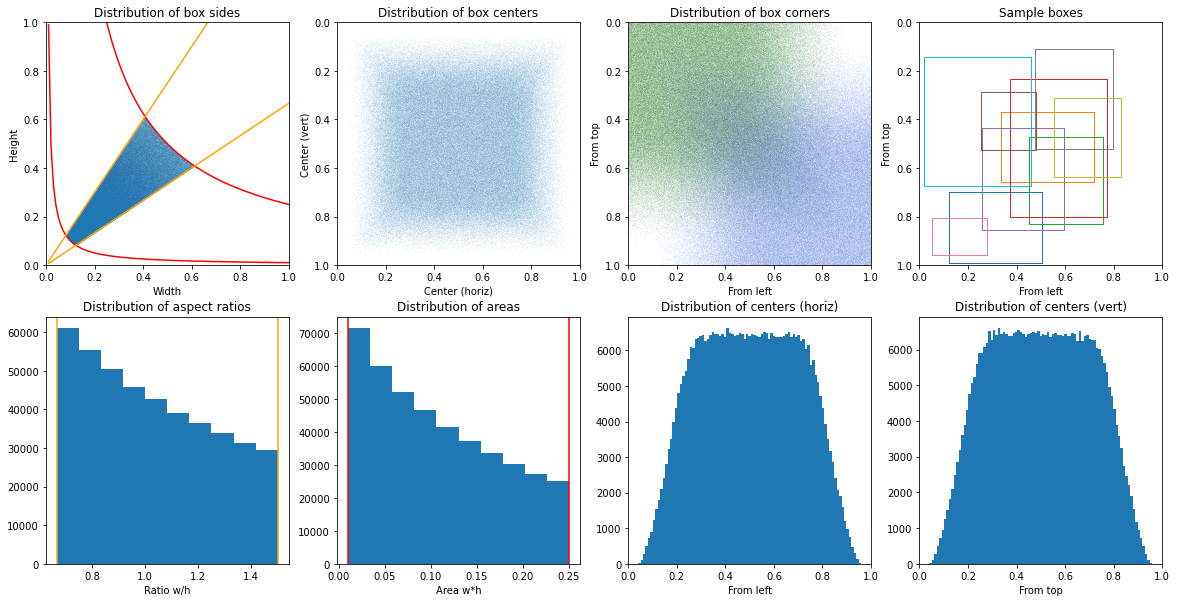

Success rate:	0.15%
Area min:	60.0%
Area max:	100.0%
Ratio min:	0.7
Ratio max:	1.5


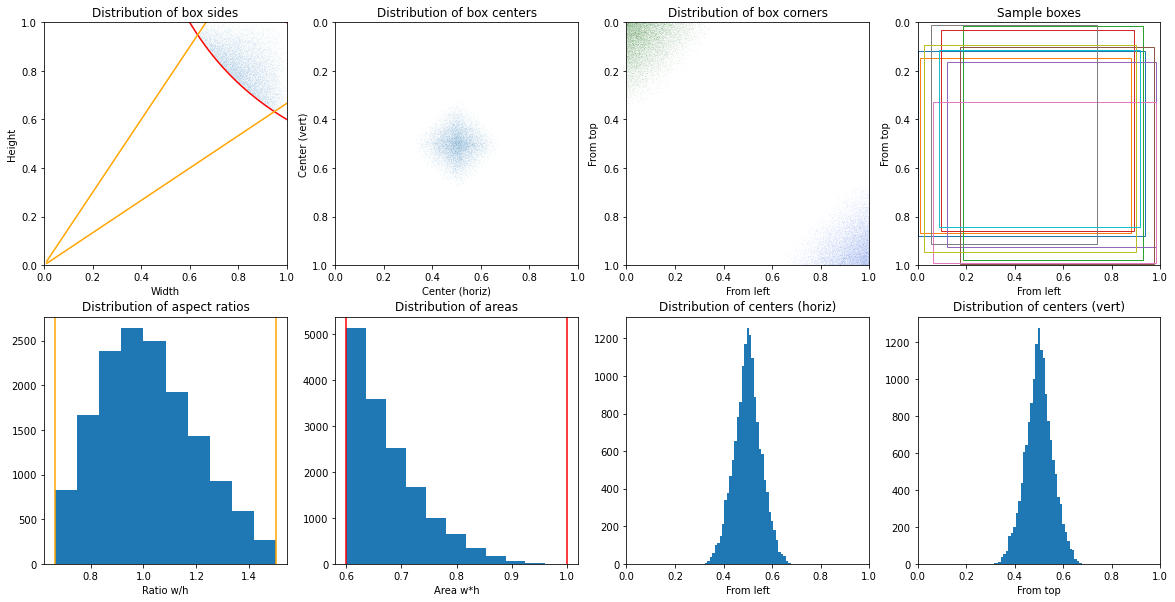

In [2]:
def boxes1(area_min, area_max, ratio_min, ratio_max, N, seed):
    rng = np.random.default_rng(seed)
    rand_i, rand_j, rand_h, rand_w = rng.uniform(size=(4, N))
    keep = (
        (rand_w * rand_h >= area_min)
        & (rand_w * rand_h <= area_max)
        & (rand_w / rand_h >= ratio_min)
        & (rand_w / rand_h <= ratio_max)
        & (rand_i + rand_h <= 1)
        & (rand_j + rand_w <= 1)
    )
    print(f"Success rate:\t{keep.sum() / N:.2%}")
    rand_h = rand_h[keep]
    rand_w = rand_w[keep]
    rand_i = rand_i[keep]
    rand_j = rand_j[keep]
    return rand_i, rand_j, rand_h, rand_w


for params in params_all:
    rand_i, rand_j, rand_h, rand_w = boxes1(**params, N=10_000_000, seed=42)
    assert_inside_image(rand_i, rand_j, rand_h, rand_w)
    assert_ratio(rand_h, rand_w, params["ratio_min"], params["ratio_max"])
    assert_area(rand_h, rand_w, params["area_min"], params["area_max"])
    plot(
        rand_i,
        rand_j,
        rand_h,
        rand_w,
        **params,
        marker_size=0.01,
    )

## Strategy 2

- Sample top-left coordinates `(i, j)` uniformly inside the unit square.
- Sample area and ratio from a uniform distribution, then turn them in height and width.
- Reject all combinations `(i, j, h, w)` that don't fall inside the image.

Success rate:	16.78%
Area min:	20.0%
Area max:	50.0%
Ratio min:	0.7
Ratio max:	1.5


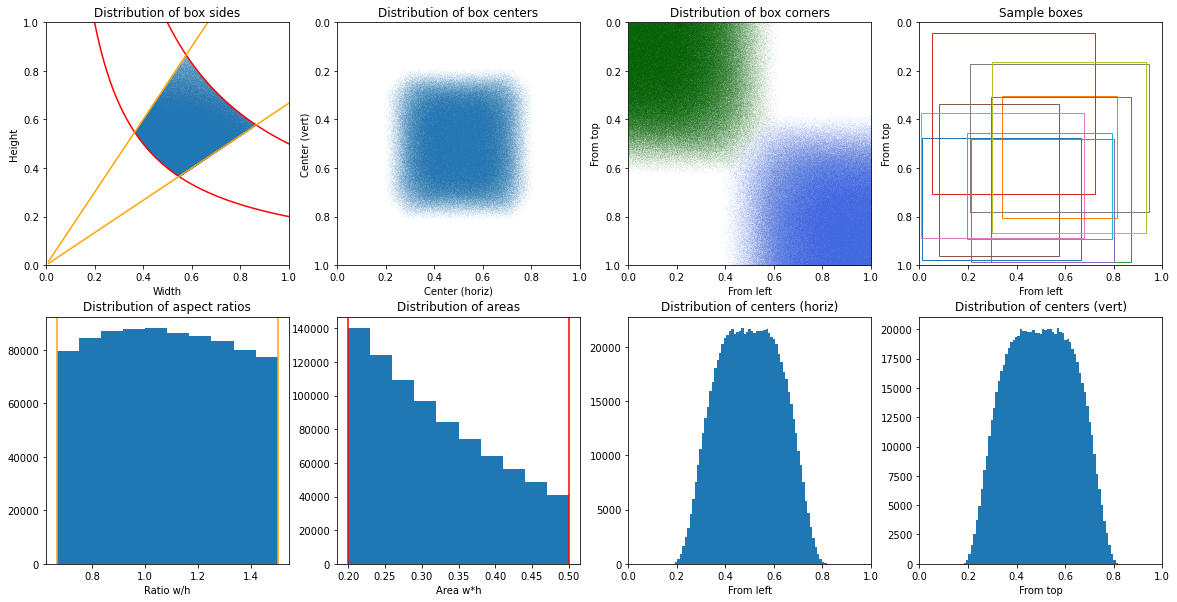

Success rate:	10.92%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.5
Ratio max:	2.0


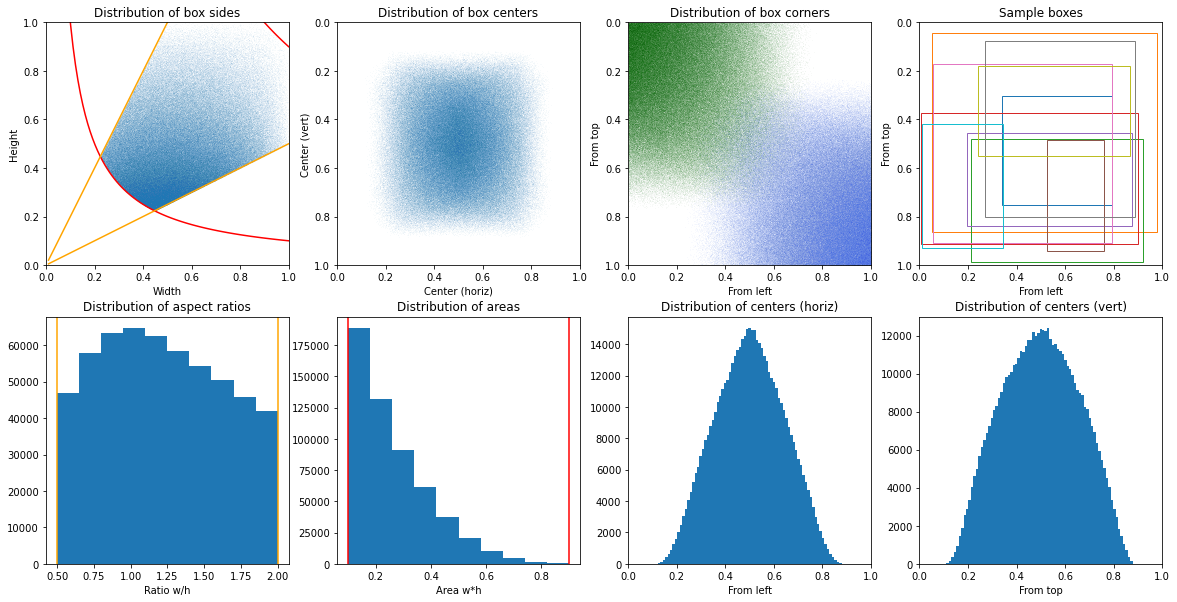

Success rate:	4.87%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	0.5


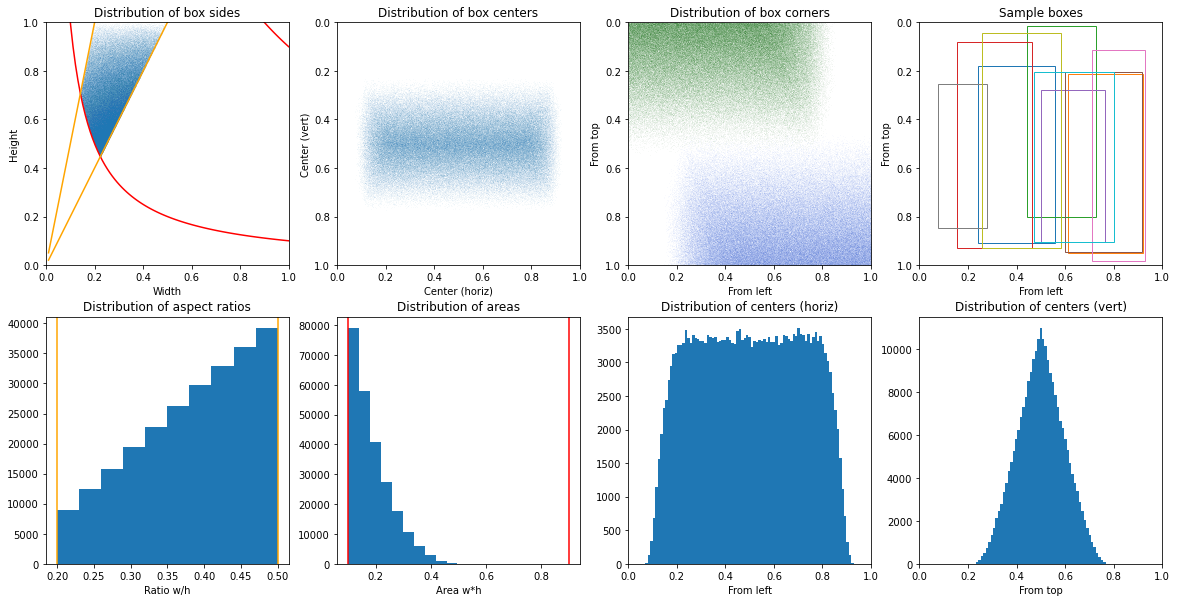

Success rate:	0.40%
Area min:	30.0%
Area max:	90.0%
Ratio min:	0.1
Ratio max:	0.5


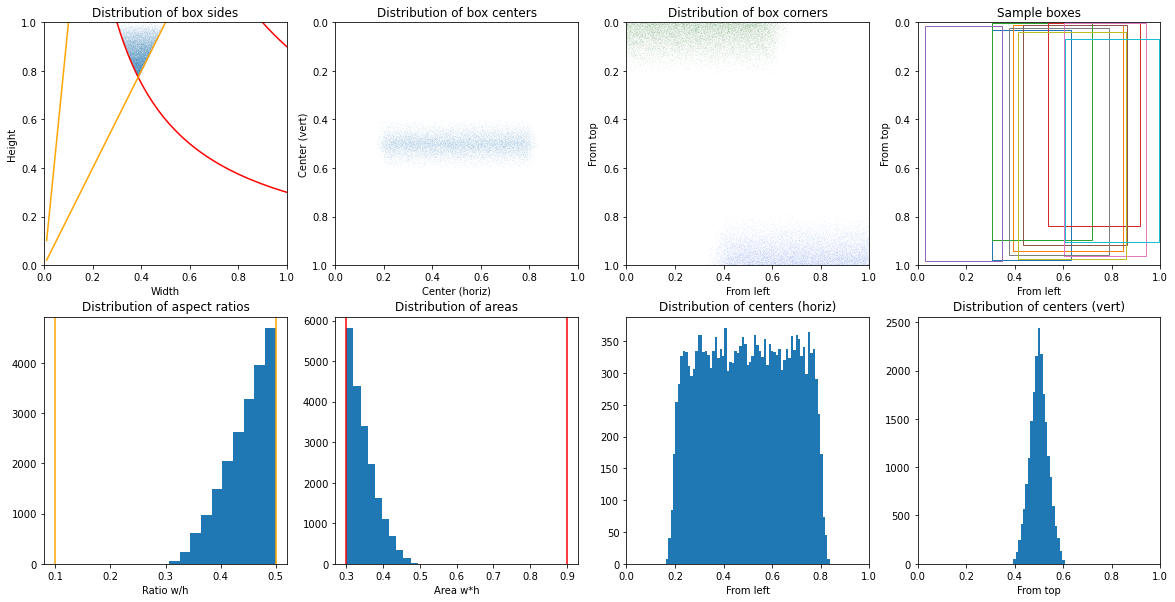

Success rate:	0.89%
Area min:	40.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	5.0


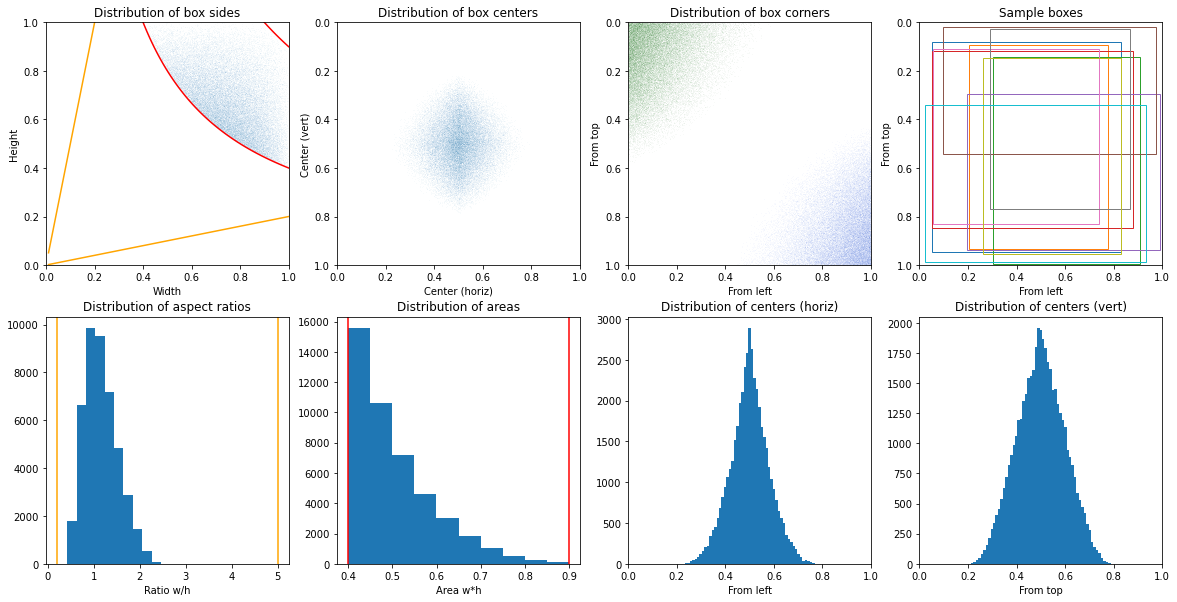

Success rate:	43.61%
Area min:	1.0%
Area max:	25.0%
Ratio min:	0.7
Ratio max:	1.5


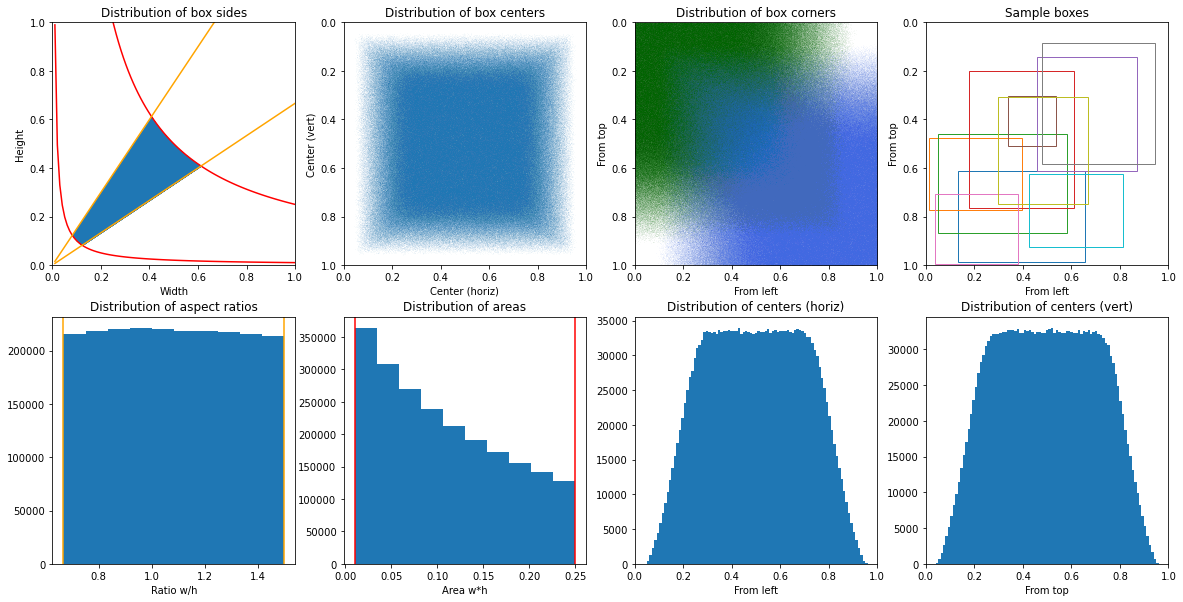

Success rate:	0.94%
Area min:	60.0%
Area max:	100.0%
Ratio min:	0.7
Ratio max:	1.5


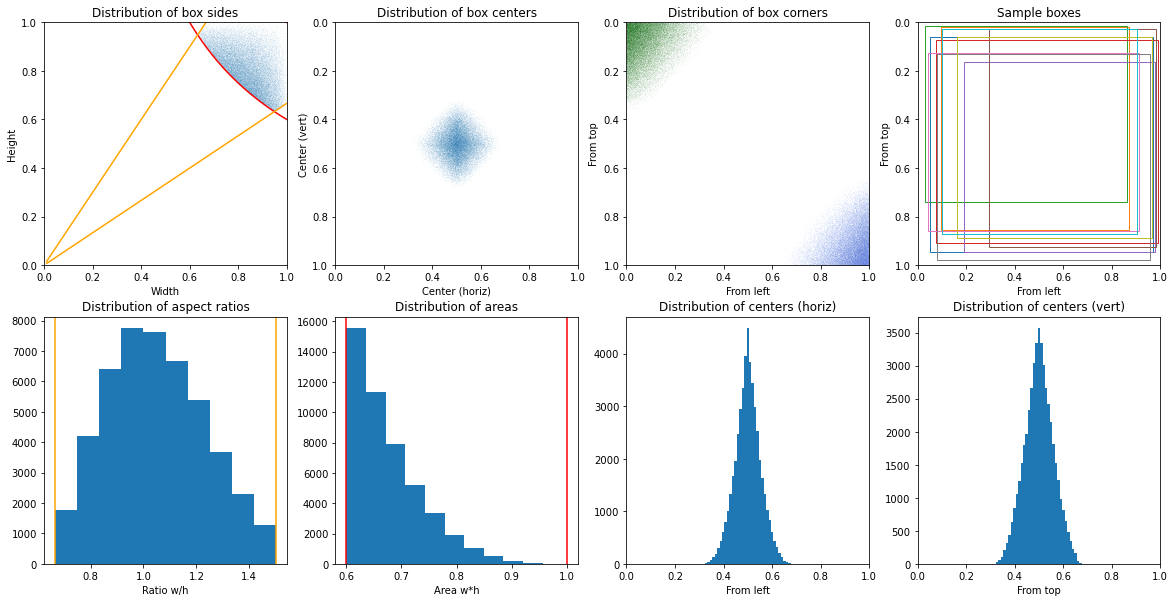

In [3]:
def boxes2(area_min, area_max, ratio_min, ratio_max, N, seed):
    rng = np.random.default_rng(seed)
    rand_area = rng.uniform(area_min, area_max, size=(N,))
    rand_ratio = rng.uniform(ratio_min, ratio_max, size=(N,))
    rand_h = np.sqrt(rand_area / rand_ratio)
    rand_w = np.sqrt(rand_area * rand_ratio)
    rand_i, rand_j = rng.uniform(size=(2, N))
    keep = (rand_i + rand_h <= 1) & (rand_j + rand_w <= 1)
    print(f"Success rate:\t{keep.sum() / N:.2%}")
    rand_h = rand_h[keep]
    rand_w = rand_w[keep]
    rand_i = rand_i[keep]
    rand_j = rand_j[keep]
    return rand_i, rand_j, rand_h, rand_w


for params in params_all:
    rand_i, rand_j, rand_h, rand_w = boxes2(**params, N=5_000_000, seed=42)
    assert_inside_image(rand_i, rand_j, rand_h, rand_w)
    assert_ratio(rand_h, rand_w, params["ratio_min"], params["ratio_max"])
    assert_area(rand_h, rand_w, params["area_min"], params["area_max"])
    plot(
        rand_i,
        rand_j,
        rand_h,
        rand_w,
        **params,
        marker_size=0.01,
    )

## Strategy 3

- Sample area and ratio from a uniform distribution, then turn them in height and width.
- Reject heights and widths that are larger than the image.
- Sample top-left coordinates `(i, j)` uniformly in the range `i in [0, 1-h]`, `j in [0, 1-w]`.

Success rate:	100.00%
Area min:	20.0%
Area max:	50.0%
Ratio min:	0.7
Ratio max:	1.5


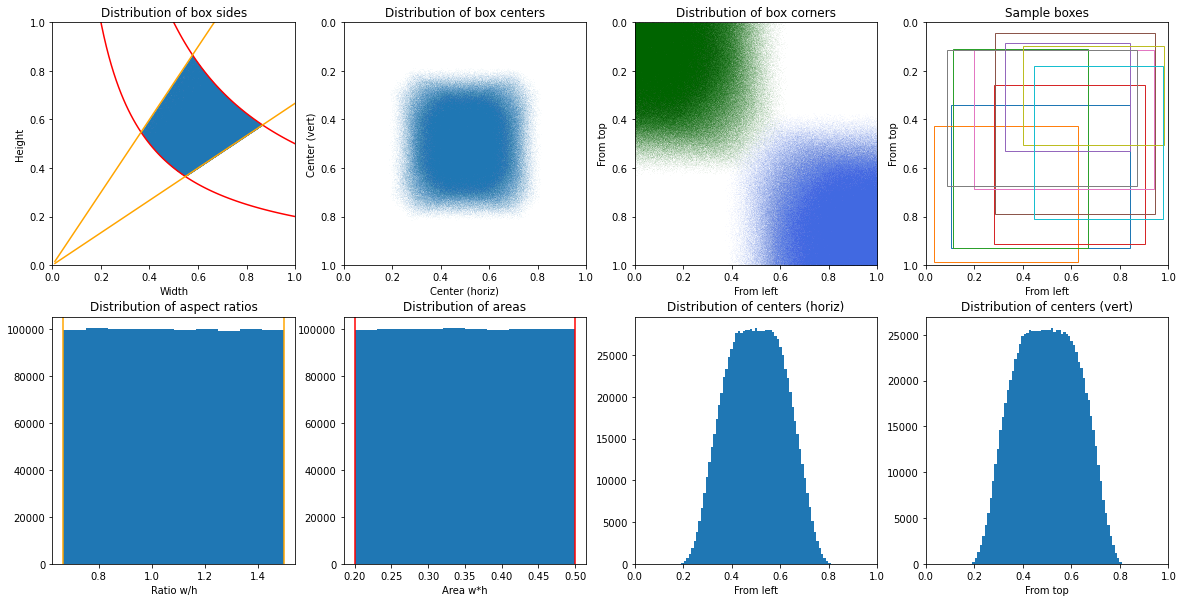

Success rate:	75.64%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.5
Ratio max:	2.0


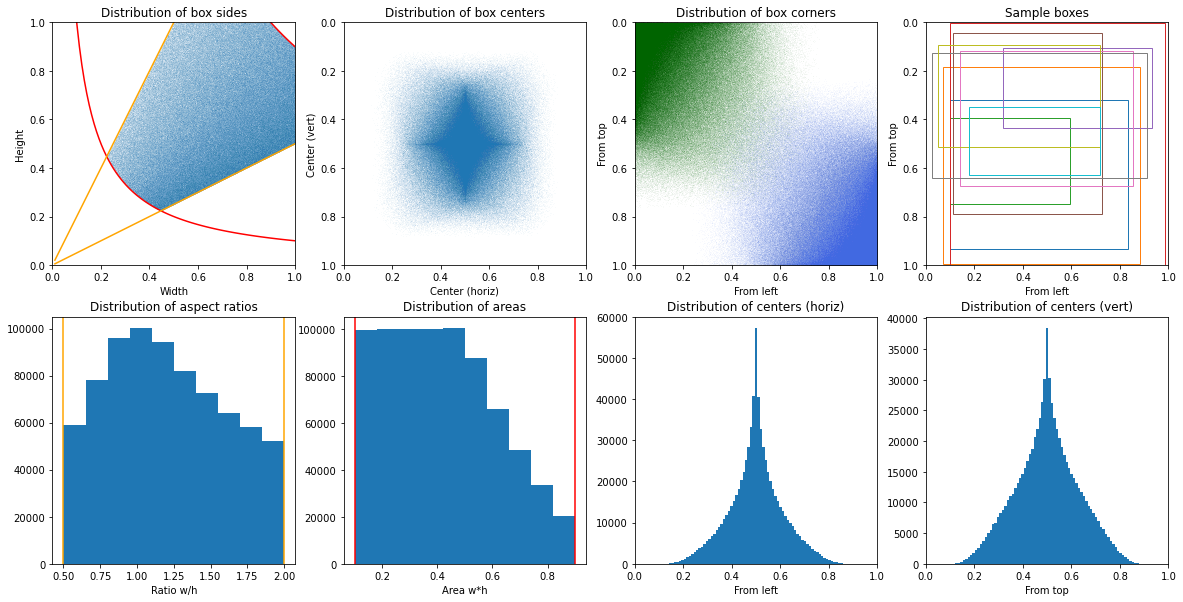

Success rate:	31.25%
Area min:	10.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	0.5


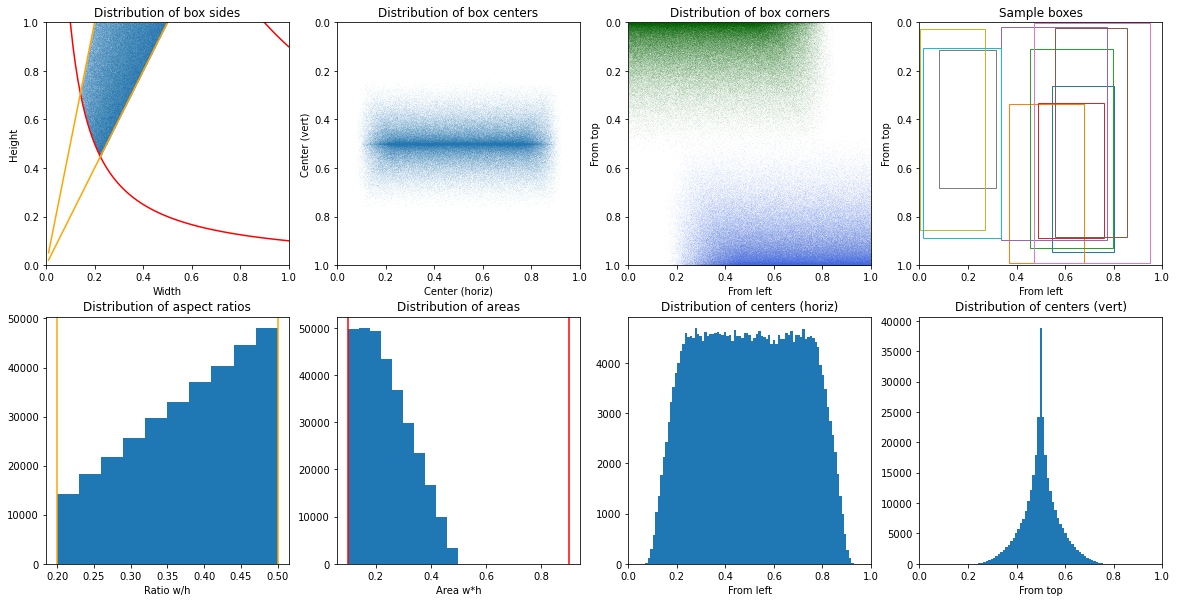

Success rate:	8.33%
Area min:	30.0%
Area max:	90.0%
Ratio min:	0.1
Ratio max:	0.5


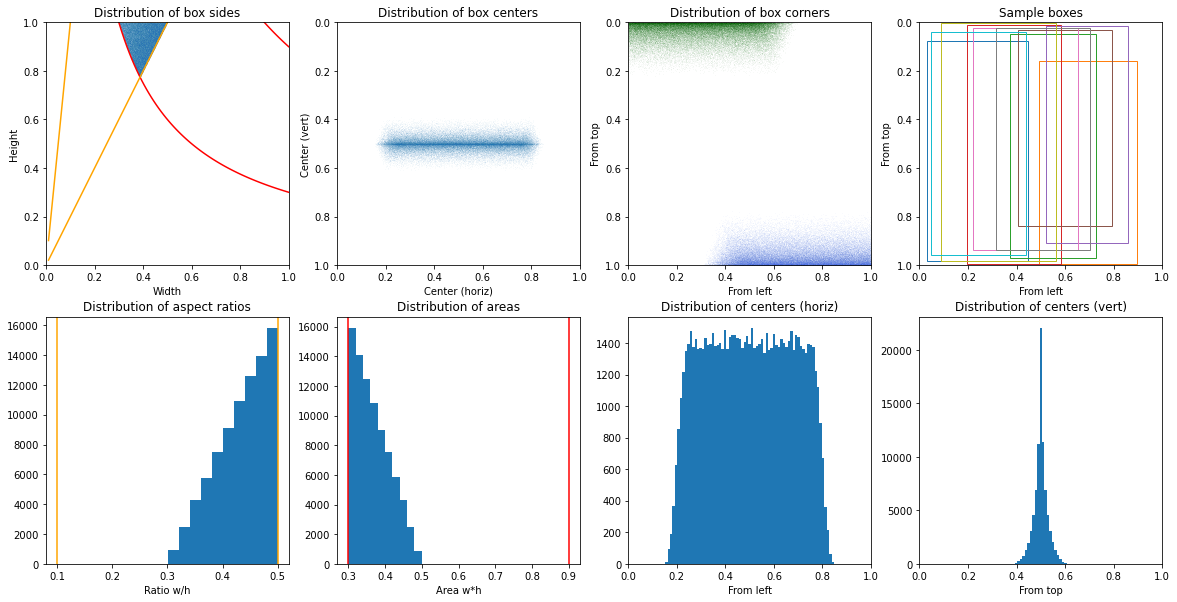

Success rate:	20.30%
Area min:	40.0%
Area max:	90.0%
Ratio min:	0.2
Ratio max:	5.0


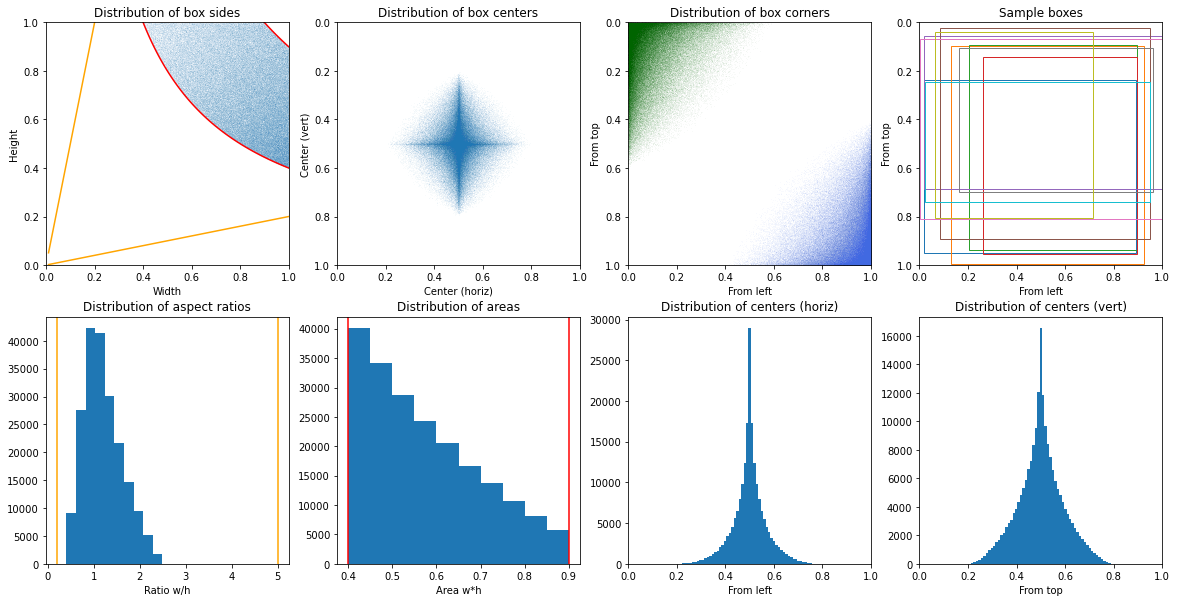

Success rate:	100.00%
Area min:	1.0%
Area max:	25.0%
Ratio min:	0.7
Ratio max:	1.5


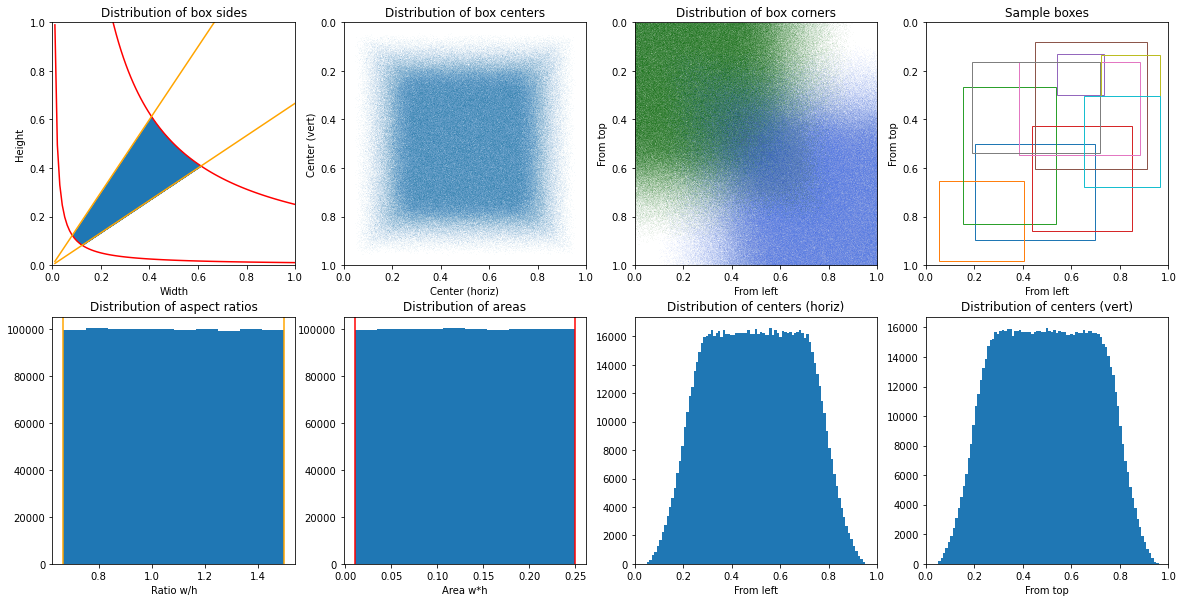

Success rate:	55.01%
Area min:	60.0%
Area max:	100.0%
Ratio min:	0.7
Ratio max:	1.5


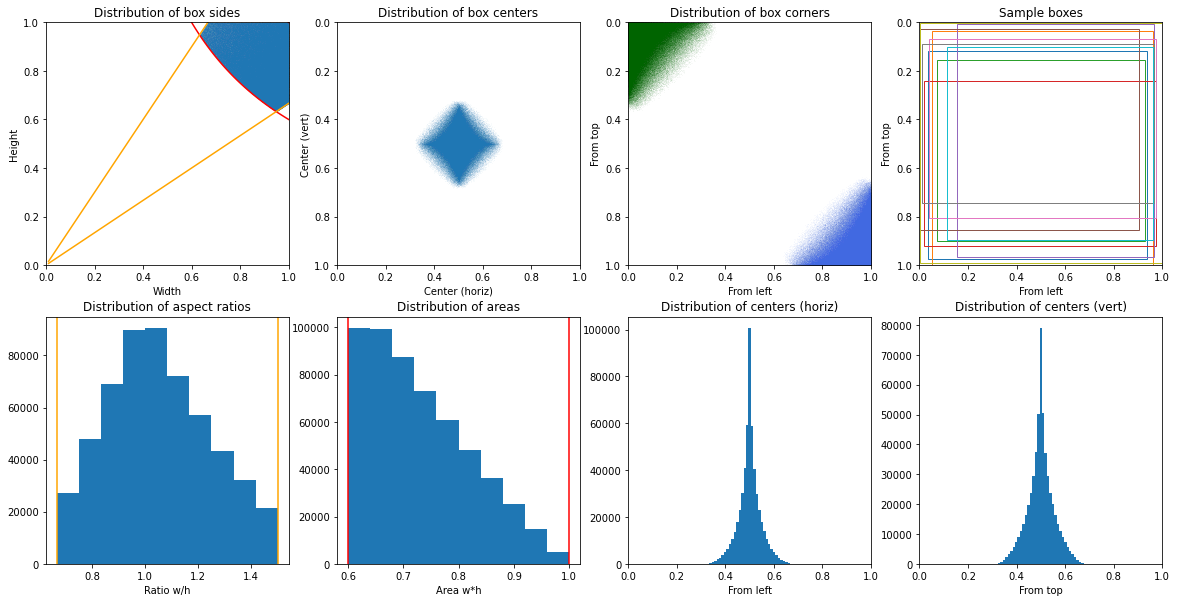

In [4]:
def boxes3(area_min, area_max, ratio_min, ratio_max, N, seed):
    rng = np.random.default_rng(seed)
    rand_area = rng.uniform(area_min, area_max, size=(N,))
    rand_ratio = rng.uniform(ratio_min, ratio_max, size=(N,))
    rand_h = np.sqrt(rand_area / rand_ratio)
    rand_w = np.sqrt(rand_area * rand_ratio)
    keep = (rand_h <= 1) & (rand_w <= 1)
    print(f"Success rate:\t{keep.sum() / N:.2%}")
    rand_h = rand_h[keep]
    rand_w = rand_w[keep]
    rand_i = rng.uniform(0, 1 - rand_h)
    rand_j = rng.uniform(0, 1 - rand_w)
    return rand_i, rand_j, rand_h, rand_w


for params in params_all:
    rand_i, rand_j, rand_h, rand_w = boxes3(**params, N=1_000_000, seed=42)
    assert_inside_image(rand_i, rand_j, rand_h, rand_w)
    assert_ratio(rand_h, rand_w, params["ratio_min"], params["ratio_max"])
    assert_area(rand_h, rand_w, params["area_min"], params["area_max"])
    plot(
        rand_i,
        rand_j,
        rand_h,
        rand_w,
        **params,
        marker_size=0.01,
    )